In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
from matplotlib.ticker import LogFormatter
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm
import pickle
from scipy.stats import norm

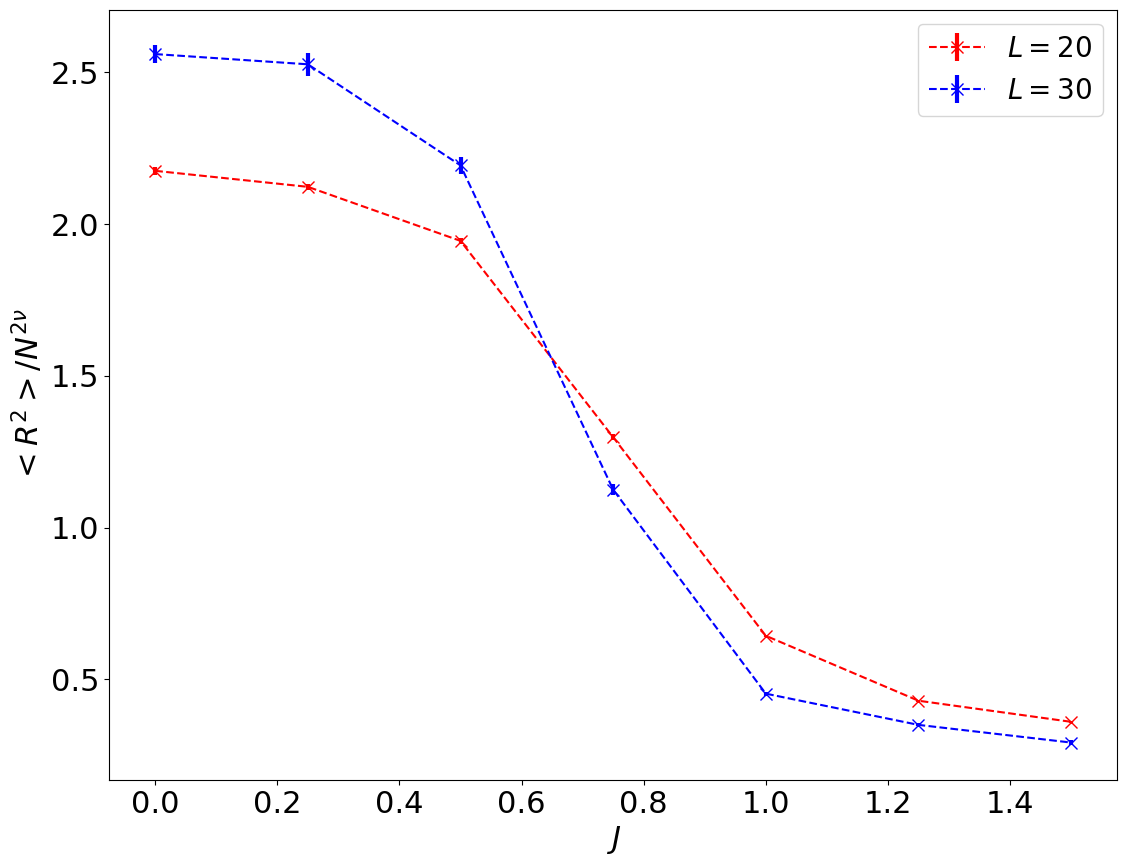

In [9]:
color = ["red", "blue", "green", "orange", "purple", "cyan", "black"]
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)
 
pathlists = Path("../SaveBeforeOptimize/").glob("*.out")
pathlists = [str(pathlist) for pathlist in pathlists]
dfs = [pd.read_csv(data, sep = " ", index_col=False).tail(1) for data in pathlists]
df = pd.concat(dfs)
df = df.sort_values(by=["J"])
i = 0
nu = 4/7
for L, grp in df.groupby("L"):
    plt.errorbar(grp['J'], grp['R2']/np.power(L, 2*nu),
              yerr=grp['R2_std']/np.power(L, 2*nu), color=color[i], fillstyle='none',
              fmt='x--', ms=8, elinewidth=3, label=r"$L=%s$" % L)
    
    i+=1


plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$  <R^2>/N^{2 \nu} $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22)
plt.tick_params(axis='y', labelsize=22)

plt.legend(fontsize=20)

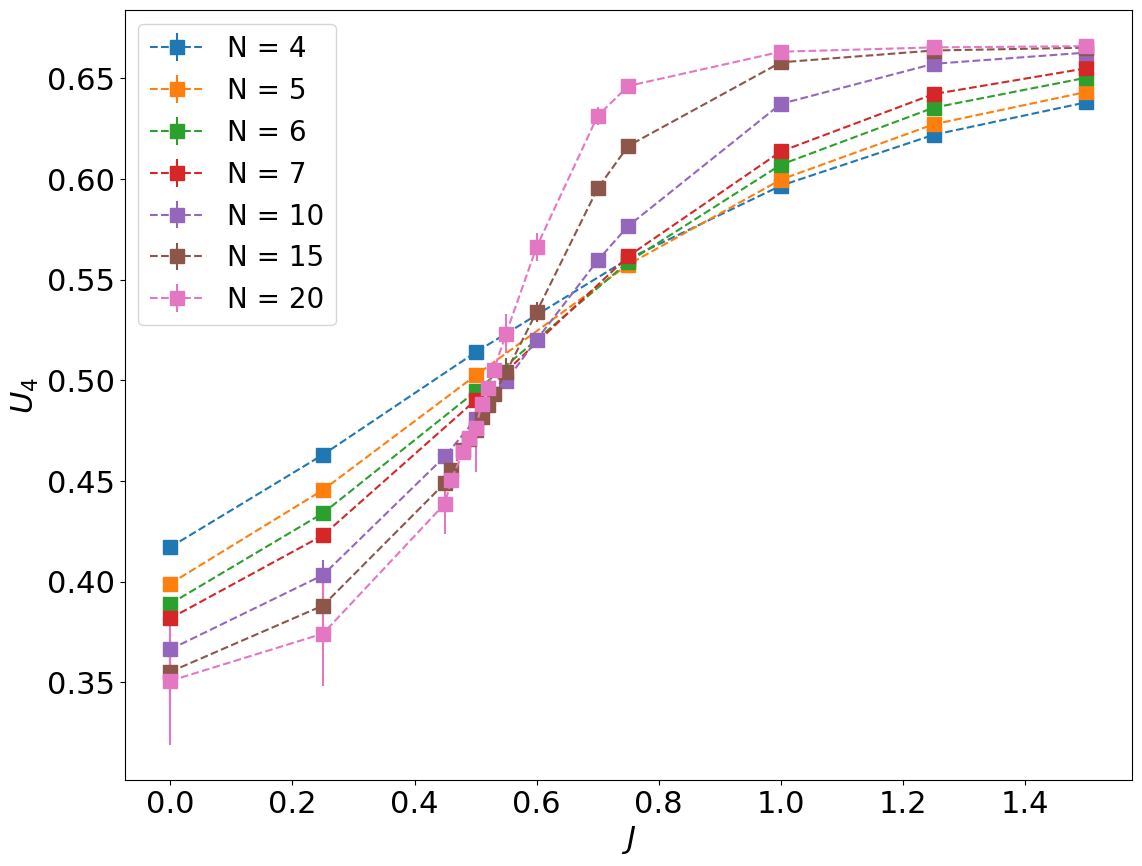

In [5]:
color = ["red", "blue", "green", "orange", "purple", "cyan", "black"]
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

pathlists = Path("../SaveBeforeOptimize_3D/").glob("*.out")
pathlists = [str(pathlist) for pathlist in pathlists]
dfs = [pd.read_csv(data, sep=" ", index_col=False).tail(1) for data in pathlists]
df = pd.concat(dfs)
df = df.sort_values(by=["J"])
i = 0
for L, grp in df.groupby("L"):
    J_l =  np.unique(grp["J"])
    bc = []
    errs=[]
    J_lplot = []
    for J in J_l :
        data_l = grp[grp["J"]==J]
        m2 = norm.rvs(data_l["Mag2"], data_l["Mag2_std"], size =  1000 )
        m4 = norm.rvs(data_l["Mag4"], data_l["Mag4_std"], size =  1000 )
        cum = 1 - m4/3/m2/m2
        mean = np.mean(cum)
        err=np.std(cum)
        bc.append(mean)
        errs.append(err)
        J_lplot.append(J)

    ax.errorbar(J_lplot, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(int(L)))

    i += 1

plt.xlabel(r'$J$', fontsize=22)
plt.ylabel(r"$  U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22)
plt.tick_params(axis='y', labelsize=22)

plt.legend(fontsize=20)


In [7]:
 pathlists

[]

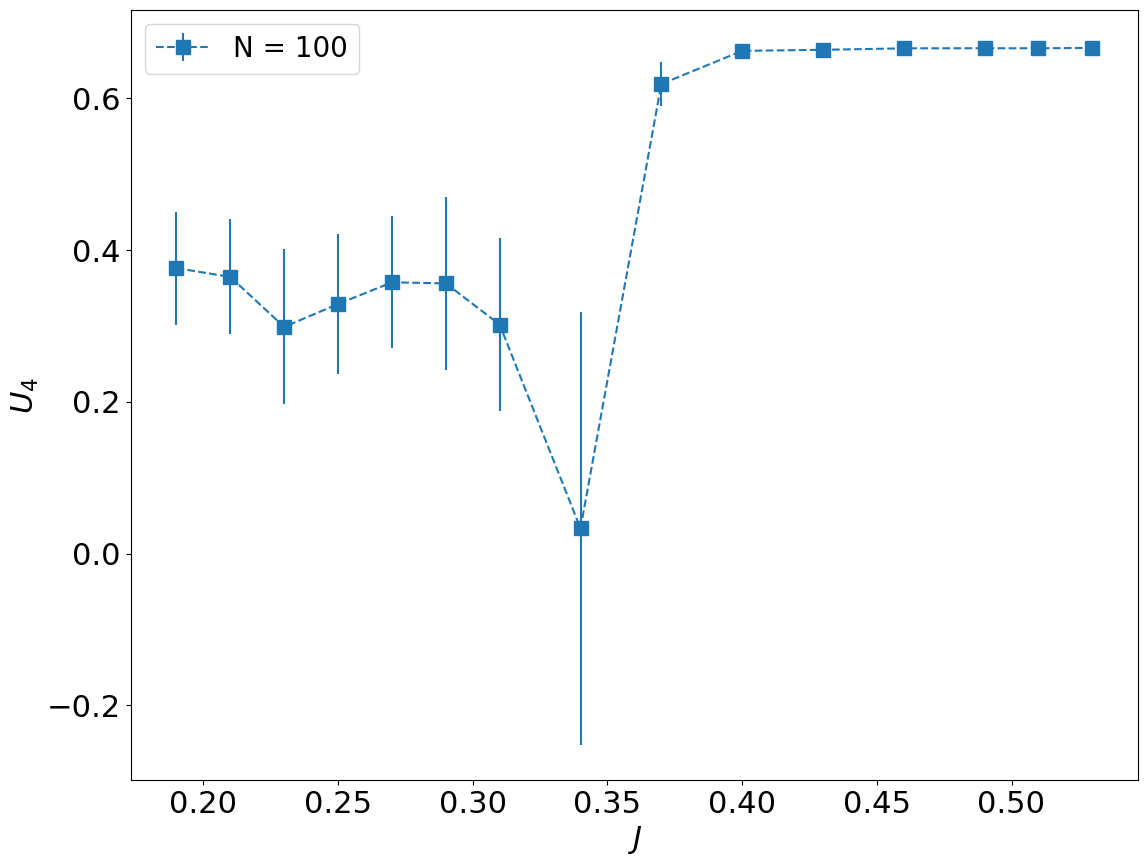

In [22]:
color = ["red", "blue", "green", "orange", "purple", "cyan", "black"]
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

pathlists = Path("../SaveBeforeOptimize_3D/").glob("*.out")
pathlists = Path("XY_MC/Run_Start/3D/").glob("*.out")
pathlists = [str(pathlist) for pathlist in pathlists]
dfs = [pd.read_csv(data, sep=" ", index_col=False).tail(1) for data in pathlists]
df = pd.concat(dfs)
df = df.sort_values(by=["J"])
i = 0
for L, grp in df.groupby("L"):
    if L > 100: continue
    J_l = np.unique(grp["J"])
    bc = []
    errs = []
    J_lplot = []
    for J in J_l:
        data_l = grp[grp["J"] == J]
        m2 = norm.rvs(data_l["Mag2"], data_l["Mag2_std"], size=2000)
        m4 = norm.rvs(data_l["Mag4"], data_l["Mag4_std"], size=2000)
        cum = 1 - m4 / 3 / m2 / m2
        mean = np.mean(cum)
        err = np.std(cum)
        bc.append(mean)
        errs.append(err)
        J_lplot.append(J)

    ax.errorbar(J_lplot, bc, yerr=errs, fmt="s--", ms=10, label="N = " + str(int(L)))

    i += 1

plt.xlabel(r'$J$', fontsize=22)
plt.ylabel(r"$  U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22)
plt.tick_params(axis='y', labelsize=22)

plt.legend(fontsize=20)
#plt.xlim(0.3, 0.8)
#plt.ylim(0, 2/3)
plt.savefig("images/EEshort_3D_U4_No1stordersigns.png", bbox_inches='tight')

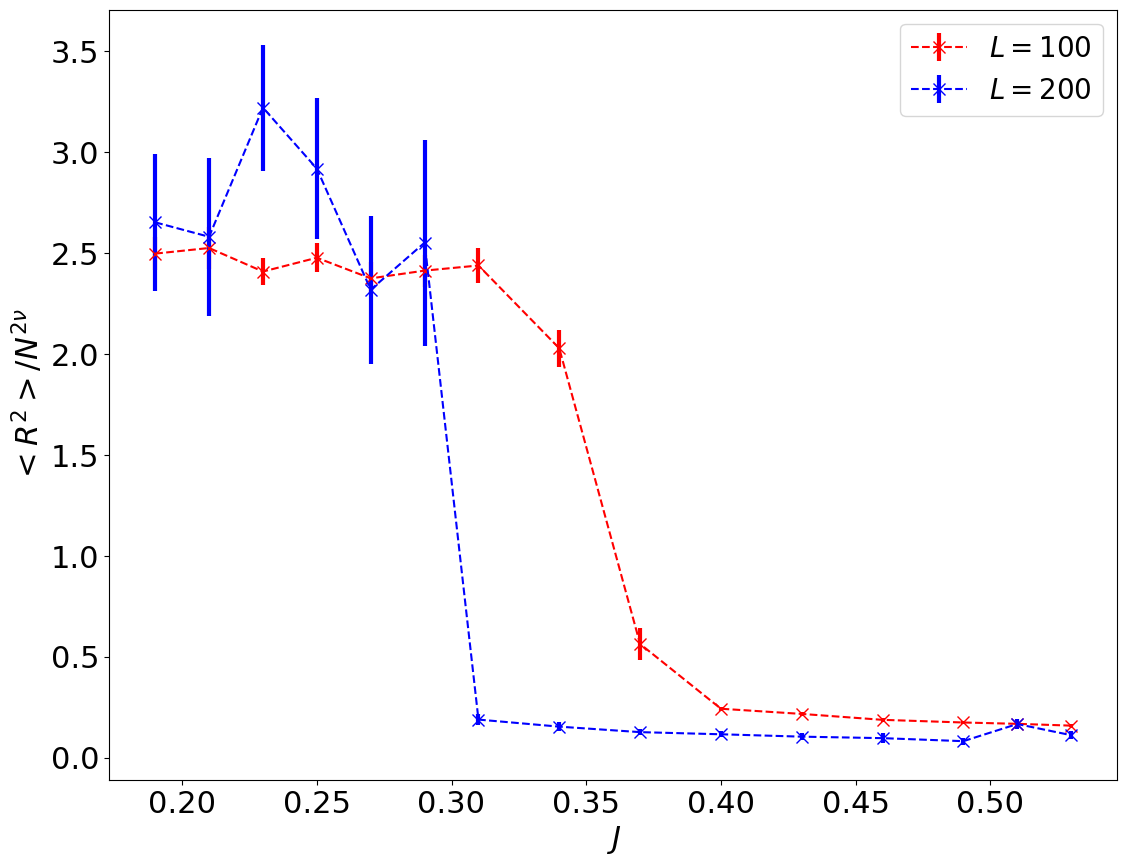

In [23]:
color = ["red", "blue", "green", "orange", "purple", "cyan", "black"]
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

pathlists = Path("../SaveBeforeOptimize_3D/").glob("*.out")
pathlists = Path("XY_MC/Run_Start/3D/").glob("*.out")
pathlists = [str(pathlist) for pathlist in pathlists]
dfs = [pd.read_csv(data, sep = " ", index_col=False).tail(1) for data in pathlists]
df = pd.concat(dfs)
df = df.sort_values(by=["J"])
i = 0
nu = 1/2
for L, grp in df.groupby("L"):
    plt.errorbar(grp['J'], grp['R2']/np.power(L, 2*nu),
                 yerr=grp['R2_std']/np.power(L, 2*nu), color=color[i], fillstyle='none',
                 fmt='x--', ms=8, elinewidth=3, label=r"$L=%s$" % L)

    i+=1


plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$  <R^2>/N^{2 \nu} $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22)
plt.tick_params(axis='y', labelsize=22)

plt.legend(fontsize=20)